## import the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import numpy as np
from nltk.tokenize import RegexpTokenizer
from itertools import islice
import matplotlib.pyplot as plt

## import the data 

In [3]:
#import the data from 
#chat1 stores the chat of 1st person of training set
#chat2 stores the chat of 2nd person of training set

#chat3 stores the chat of 1st person of test set
#chat4 stores the chat of 2nd person of test set


chat1=[]
chat2=[]
chat3=[]
chat4=[]

def yield_alt(f, option='odd'):
    
        if option == 'odd':
            return islice(f, 0, None, 2)
        return islice(f, 1, None, 2)
 
with open('training_dataset.txt') as f:
    for line in yield_alt(f):      
        chat1.append(line)

with open('training_dataset.txt') as f:
    for line in yield_alt(f, 'even'):
        chat2.append(line)
        
with open('test_dataset.txt') as f:
    for line in yield_alt(f):      
        chat3.append(line)

with open('test_dataset.txt') as f:
    for line in yield_alt(f, 'even'):
        chat4.append(line)

      
        

## showing some samples

In [4]:
chat1[:5],chat2[:5]

(['hi\n', 'hello\n', 'hey\n', "what's up\n", 'greetings\n'],
 ['hi\n', 'hi\n', 'hi\n', 'nothing much\n', 'greetings\n'])

In [5]:
chat3[:5],chat4[:5]

(['hey\n',
  "what's up\n",
  'greetings\n',
  'how are you\n',
  'how are you doing today\n'],
 ['hi\n',
  'nothing much\n',
  'greetings\n',
  "I'm doing good\n",
  "I'm doing good\n"])

In [6]:
len(chat1),len(chat3)

(30, 33)

## tokenizes the list of strings and finds the vocab size

In [7]:
#ques stores the tokenized list of chat1
#ans stores tokenized list of chat2
#ques1 stores the tokenized list of chat3
#ans1 stores tokenized list of chat4

#words store total number of words
#vocab_stores total number of unique words

tokenizer = RegexpTokenizer(r'\w+')

ques,ans=[],[]
words=[]

for i in chat1:
    
        tr=map(str.lower,tokenizer.tokenize(i))
        ques.append(tr)
        words.extend(tr)
        
for i in chat2:
    
        tr=map(str.lower,tokenizer.tokenize(i)) 
        ans.append(tr)
        words.extend(tr)
           
ques1=[]
ans1=[]
        
for i in chat3:
    
        tr=map(str.lower,tokenizer.tokenize(i))
        ques1.append(tr)
        words.extend(tr)
        
for i in chat4:
    
        tr=map(str.lower,tokenizer.tokenize(i)) 
        ans1.append(tr)
        words.extend(tr)

In [8]:
len(ques1)

33

## vocabulary size

In [9]:
vocab_size=len((set(words)))
vocab_size

128

## finds dictionary of words (id to word and word to id)

In [10]:
id_to_word=dict(enumerate(set(words)))

word_to_id={k:v for v,k in id_to_word.items()}


## data stores tokenized question and answer as a whole

In [11]:
data=[]

a=[data.append(i) for i in ques]
a=[data.append(i) for i in ans]
a=[data.append(i) for i in ques1]
a=[data.append(i) for i in ans1]

## Adding an empty string to the dictionary

In [12]:
# Adds empty string corresponding the index added for padding in the later part part of code

id_to_word[vocab_size]=''

## converting words to indices of ques and ans

In [13]:
# train and target stores the  indices corresponding to words of ques and ans

train,target=[],[]
test,test_target=[],[]

for i in range(len(ques)):
    
    train.append([word_to_id[x] for x in ques[i]])
    target.append([word_to_id[x] for x in ans[i]])

for i in range(len(ques1)):
    test.append([word_to_id[x] for x in ques1[i]])
    test_target.append([word_to_id[x] for x in ans1[i]])
    
    
    

## padding to make all sequence of equal length

In [14]:
# max_length calculates length of longest sequence and add 100 as a padding to make all sequence of equal length

max_length = max([len(i) for i in data])

for i in range(len(train)):
    
    train[i] =[j for j in train[i]] + [vocab_size] * (max_length - len(train[i]))

    target[i] =[j for j in target[i]] + [vocab_size] * (max_length - len(target[i]))
    
for i in range(len(test)):
    
    test[i] =[j for j in test[i]] + [vocab_size] * (max_length - len(test[i]))

    test_target[i] =[j for j in test_target[i]] + [vocab_size] * (max_length - len(test_target[i]))
 

## converting list into array to feed in the network

In [15]:

train = np.array(train)

target = np.array(target)
test = np.array(test)

test_target = np.array(test_target)

In [16]:
train[:3],target[:3]

(array([[ 68, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [ 60, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128]]),
 array([[ 68, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [ 68, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [ 68, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128]]))

In [17]:
test[:3],test_target[:3]

(array([[ 60, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [ 33,  51,  76, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [  4, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128]]),
 array([[ 68, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [ 55,  62, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128],
        [  4, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
         128, 128]]))

## embedding vector

In [20]:
# one hot encoding is used as an embedding vector

vec = np.zeros((vocab_size+1, vocab_size+1))

for k in id_to_word.keys():
    vec[k][k] = 1

# constant tensor for word embedding(one hot)

embed = tf.constant(vec, dtype=tf.float32)

## initializing variables

In [21]:
input_size = vocab_size+1
output_size = vocab_size+1
iterations = 5001
hidden_layer = 60
learning_rate = 0.001


## initializing random weights 

### for encoder

In [22]:

Wxhe=tf.Variable(tf.random_normal(([input_size,hidden_layer]),0,0.1),dtype=tf.float32)

Whhe=tf.Variable(tf.random_normal(([hidden_layer,hidden_layer]),0,0.1),dtype=tf.float32)

Whye=tf.Variable(tf.random_normal(([hidden_layer,output_size]),0,0.1),dtype=tf.float32)


### for decoder

In [23]:
Wxhd=tf.Variable(tf.random_normal(([189,60]),0,0.1),dtype=tf.float32)

Whhd=tf.Variable(tf.random_normal(([hidden_layer,hidden_layer]),0,0.1),dtype=tf.float32)

Whyd=tf.Variable(tf.random_normal(([120,output_size]),0,0.1),dtype=tf.float32)


## function to train the RNN

In [24]:
def train_nn(): # execution of training starts with this function
    
    with tf.variable_scope("train_nn"):
        
        #placeholder for input, output and hidden state and previous outputs of encoder and decoder
        loss_plot,itr=[],[]
        
        x=tf.placeholder(shape=[None,max_length], dtype=tf.int32) 
        y=tf.placeholder(shape=[None,None],dtype=tf.int32)
        
        hinit = tf.placeholder(shape=[None, hidden_layer], dtype=tf.float32)
        
        xinit=tf.placeholder(shape=[None,vocab_size+1],dtype=tf.float32)
        
        prob=tf.placeholder(shape=[None,vocab_size+1],dtype=tf.float32)
        
        context_vec=tf.placeholder(shape=[None,hidden_layer],dtype=tf.float32)

        #embedding target as one hot
        Y_embed = tf.nn.embedding_lookup(embed,y)

        # encoder_output is the context vector and encoder state is the hidden state of lat time space
        encoder_output,encoder_states,last_ht=encoder(x,hinit,xinit)

        #decoder_output is the output of decoder(as an output of softmax layer)
        decoder_output=decoder(x,encoder_output,tf.transpose(encoder_states,[1,0,2]),prob,last_ht,context_vec)
        decoder_output = tf.transpose(decoder_output, [1, 0, 2])
        
        #takes the argmax of output to find the indices of the corresponding word 
        decoder_output_arg=tf.argmax(decoder_output,axis=2)
        one_hot_out=tf.nn.embedding_lookup(embed,(tf.cast(decoder_output_arg, tf.int32)))
        
        #loss takes the mean of all the samples loss (loss function used is softmax_cross_entropy_with_logits)
        loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=decoder_output,labels=Y_embed))
        
        optimizer=tf.train.AdamOptimizer(0.001).minimize(loss)
        
        with tf.Session() as session:

            session.run(tf.global_variables_initializer()) #initializes the variables
            session.run(tf.local_variables_initializer())
            
            #iterating the loop
            for i in range(60001):
                
                #runs the loss and optimizer function by feeding train, target and hidden state to their placeholders 
                #l is the loss at each iteration
                
                l,_=session.run([loss,optimizer],
                feed_dict={x:train, y:target,hinit:np.zeros((30,hidden_layer)),xinit:np.zeros((30,vocab_size+1))
                    ,prob:np.zeros((30,vocab_size+1)),context_vec:np.zeros((30,hidden_layer))})
                
                loss_plot.append(l)
                itr.append(i)
                
                if i%1000==0:
                    print "loss for",i,"iteration:",l
                    loss_plot.append(l)
                    itr.append(i)
                
                #predict outputs the decoders output after each weight tuning at each iteration
                
                
                    predict = session.run(decoder_output_arg,
                    {x:train, y:target,hinit:np.zeros((30,hidden_layer)),xinit:np.zeros((30,vocab_size+1)),
                     prob:np.zeros((30,vocab_size+1)),context_vec:np.zeros((30,hidden_layer))})
                
                if(i%5000==0):
                    
                    
                    for j in range(20,29):#print predicted result of training 10 sample 

                        print("chat1 : ", [[id_to_word[w] for w in sent] for sent in train][j])
                        print("chat2 : ", [[id_to_word[w] for w in sent] for sent in predict][j])
                        
                        
                        
            print"---------Training over------------"
            
            print "---testing the trained model with test data----"
            
            out_test = session.run(decoder_output_arg, {x:test, 
                hinit: np.zeros((33, hidden_layer)),xinit:np.zeros((33,vocab_size+1)),
                prob:np.zeros((33,vocab_size+1)),context_vec:np.zeros((33,hidden_layer))})
            
            for k in range(33):#print predicted result of test samples

                        print("chat1 : ", [[id_to_word[w] for w in sent] for sent in test][k])
                        print("chat2 : ", [[id_to_word[w] for w in sent] for sent in out_test][k])
                        
            #calculating accuracy of test samples
                        
            correct_pred=tf.equal(out_test,test_target)
            
            accuracy=tf.reduce_mean(tf.cast(correct_pred,'float'))  
            
            a=accuracy.eval(feed_dict={x:test, y:test_target,
                hinit: np.zeros((33, hidden_layer)),xinit:np.zeros((33,vocab_size+1)),
                prob:np.zeros((33,vocab_size+1)),context_vec:np.zeros((33,hidden_layer))})
            
            print "accuracy of test samples",a
                        
            return loss_plot,itr

## encoder function to find the context vector and hidden state of input sequence

In [25]:
def encoder(X,hinit,xinit):#takes input sequence and initial hidden state and initial output 
    
    with tf.variable_scope("encoder"):
        
        #embedding for train to one hot
        X_embed = tf.nn.embedding_lookup(embed,X)
        X_embed = tf.transpose(X_embed, [1, 0, 2])

        #list of hidden state and output
        con=[hinit,xinit]
        
        #scans encoder's helper function RNN_enc 
        output= tf.scan(RNN_enc, X_embed, initializer=con)
  
        
        h_t=output[0]
        y_t=output[1]
        
        last_ht=h_t[-1]
        y_t=y_t[-1]

        
        arg=tf.argmax(y_t,axis=1)
        arg_one_hot=tf.nn.embedding_lookup(embed,(tf.cast(arg, tf.int32)))
        
        #returns one hot vector of encoder's output and hidden state
        return arg_one_hot,h_t,last_ht


## encoder's helper function

In [26]:
def RNN_enc(h, x_t):#helper function of encoder (takes hidden states,output and input sequence)
    
    with tf.variable_scope('RNN_enc'):
        
            #reshapes input sequence
            x_t = tf.reshape(x_t, [-1, input_size])
            x_t=tf.cast(x_t, tf.float32)

            #reshapes hidden state
            hprev = tf.reshape(h[0], [-1, hidden_layer])

            #h_t calculates the wighted sum of inputs and hidden  state of previous layes 
            #and then pass it to the activation function
            
            h_t=tf.tanh(tf.matmul(hprev,Whhe) + tf.matmul(x_t,Wxhe))
            h_t = tf.reshape(h_t, [-1, hidden_layer])

            #out is the output from the softmax layer
            out=tf.nn.softmax(tf.matmul(h_t,Whye))


            x_and_h=[h_t,out]        

            #reurns list of hidden state and ouput of encoder
            return x_and_h

## decoder function

In [27]:
def decoder(X,xprev,s,prob,last_ht,context_vec):
    
    #takes input sequence  
    #last hidden state from encoder 
    #hidden states of encoder
    #initial input to decoder 
    #context vector
    
    with tf.variable_scope("decoder"):
        
        #embedding for train to one hot
        X_embed = tf.nn.embedding_lookup(embed,X)
        X_embed = tf.transpose(X_embed, [1, 0, 2])

        #list of hidden states,output of previous state
        con=[s,xprev,prob,last_ht,context_vec]

        #scans decoder's helper function RNN_enc 
        output= tf.scan(RNN_dec, X_embed, initializer=con)

        h_dec=output[0]

        out_prob=output[2]
        
        #returns output from decoder
        return out_prob


## decoder's helper function

In [28]:
def RNN_dec(h, x_t):
    
     #takes hidden state of previous time state
     #ouput of previous state
     #input sequence just for the sake of working of scan function to iterate
     #all hidden states of encoder
     #context vector
        
        with tf.variable_scope('RNN_dec'):
            
            hprev=h[3]
            yprev=h[1]
            enc_state=h[0]
            context=h[4]
            
            #reshape
            hprev = tf.reshape(hprev, [-1, hidden_layer])

            yprev = tf.reshape(yprev, [-1, input_size])
            
            
            #h_t calculates the wighted sum of inputs and hidden  state of previous layes 
            #and then pass it to the activation function
            
            y_and_c=tf.concat([yprev,context],axis=1)
            
            h_t=tf.tanh(tf.matmul(y_and_c,Wxhd)+tf.matmul(hprev,Whhd))
            h_t = tf.reshape(h_t, [-1, hidden_layer])

            
            attention_score=tf.multiply(enc_state,tf.expand_dims(h_t, 1))  
            
            
            attention_score=tf.transpose(attention_score,[0,2,1])
            
            attention_score=tf.reduce_sum(attention_score,axis=1)
            
            attention_score=tf.nn.softmax(attention_score)
            
            
            
            context=tf.multiply(tf.transpose(enc_state,[0,2,1]),tf.expand_dims(attention_score,1))
             
            
            context=tf.reduce_sum(tf.transpose(context,[0,2,1]),axis=1)
            
            
            con=tf.concat([h_t,context],axis=1)
            
            #out is the output from the softmax layer
            out=tf.nn.softmax(tf.matmul(con,Whyd))
            
            arg=tf.argmax(out,axis=1)
            arg_one_hot=tf.nn.embedding_lookup(embed,arg)

            x_and_h=[enc_state,arg_one_hot,out,h_t,context] 
            
            #reurns list of hidden states,context vector and ouput of decoder
            return x_and_h

## function to start the execution of training

In [29]:
#start of execution of training
loss,it=train_nn()

loss for 0 iteration: 4.85965
('chat1 : ', ['how', 'to', 'get', 'to', 'your', 'office', 'if', 'i', 'come', 'from', 'switzerland', '', '', '', ''])
('chat2 : ', ['sure', 'switzerland', '', 'may', 'am', 'urgent', 'station', 'station', 'i', 'sure', 'urgent', 'station', 'hi', 'on', 'in'])
('chat1 : ', ['how', 'to', 'get', 'to', 'your', 'office', 'if', 'i', 'come', 'by', 'car', '', '', '', ''])
('chat2 : ', ['sure', 'switzerland', '', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in'])
('chat1 : ', ['how', 'to', 'get', 'to', 'your', 'office', 'if', 'i', 'come', 'by', 'bike', '', '', '', ''])
('chat2 : ', ['sure', 'switzerland', '', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in'])
('chat1 : ', ['how', 'to', 'get', 'to', 'your', 'office', 'if', 'i', 'come', 'by', 'motobike', '', '', '', ''])
('chat2 : ', ['sure', 'switzerland', '', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in'])
('chat1 : ', ['i', 'need', 'to', 'make', 'an'

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 11:11:47.554826. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


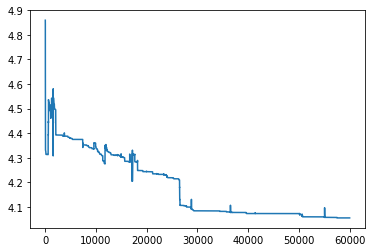

In [33]:
plt.plot(it,loss)
plt.show()